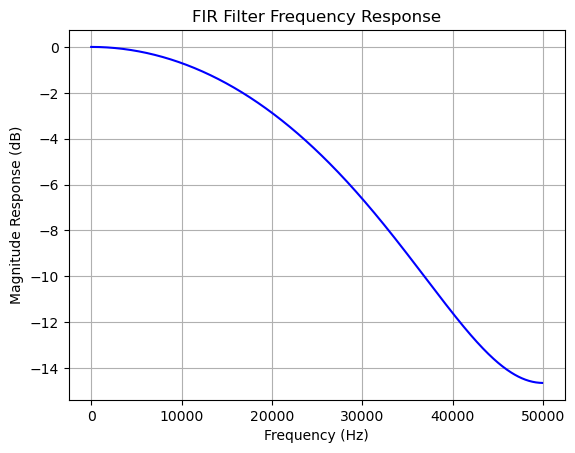

In [69]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

#FIR Frequency Response
b1 = signal.firwin(5, 0.5) #create FIR transfer function
w1, h1 = signal.freqz(b1, fs=100000) #compute freq response

#plot graph
plt.title('FIR Filter Frequency Response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.ylabel('Magnitude Response (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

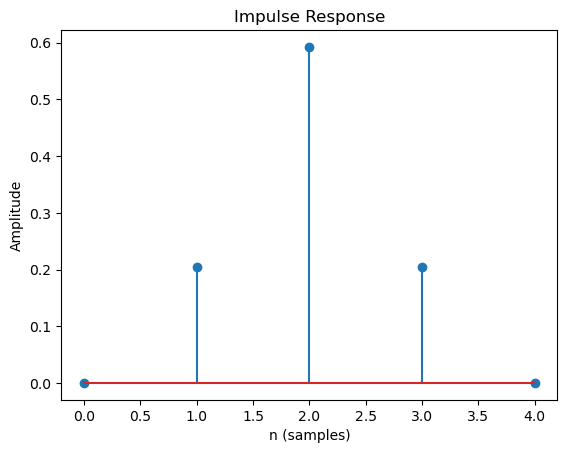

In [71]:
impulse = np.zeros(5) #create 0s
impulse[0] = 1 #make the impulse response
response = signal.lfilter(b1, 1, impulse) 

plt.stem(response)
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.show()

In [6]:
#Here we can see that the low pass FIR filter has a pole at around 2 kHz.

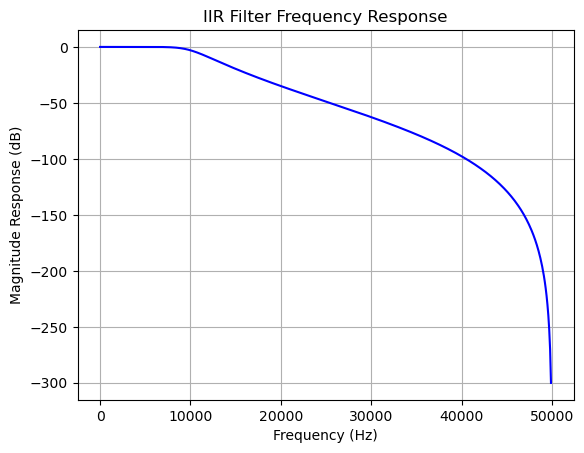

In [73]:
#IIR Frequency Response
b2, a2 = signal.iirfilter(5, Wn=0.2, btype='lowpass',output='ba')
w2, h2 = signal.freqz(b2, a2, fs=100000)

plt.title('IIR Filter Frequency Response')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'b')
plt.ylabel('Magnitude Response (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

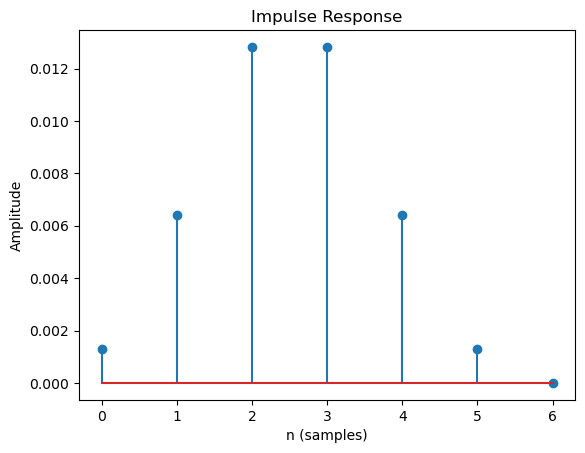

In [8]:
impulse = np.zeros(7)
impulse[0] = 1
response = signal.lfilter(b2, 1, impulse)

plt.stem(response)
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.show()

In [9]:
#Here we can see that IIR Filter has a pole at 1kHz and since it has an infinite impulse response, we can see that it drops off at 5kHz.

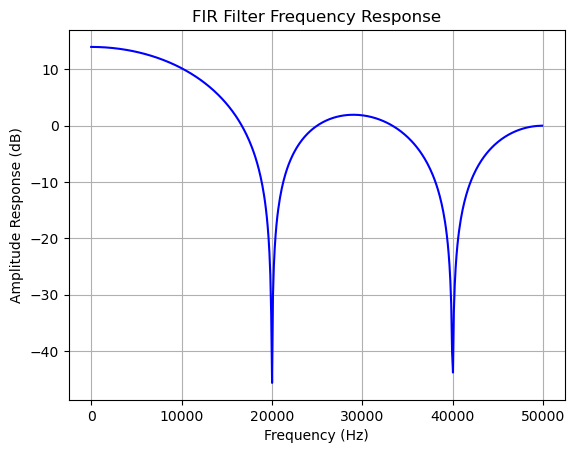

In [75]:
#Part b
b3 = np.array([1, 1, 1, 1, 1]) #create coefficients
w3, h3 = signal.freqz(b3, fs=100000) #compute freq response

#plot graph
plt.title('FIR Filter Frequency Response')
plt.plot(w3, 20*np.log10(np.abs(h3)), 'b')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

In [11]:
#Here we can see that the FIR filter has poles at 1kHz, 2kHz, 3kHz, and 4kHz

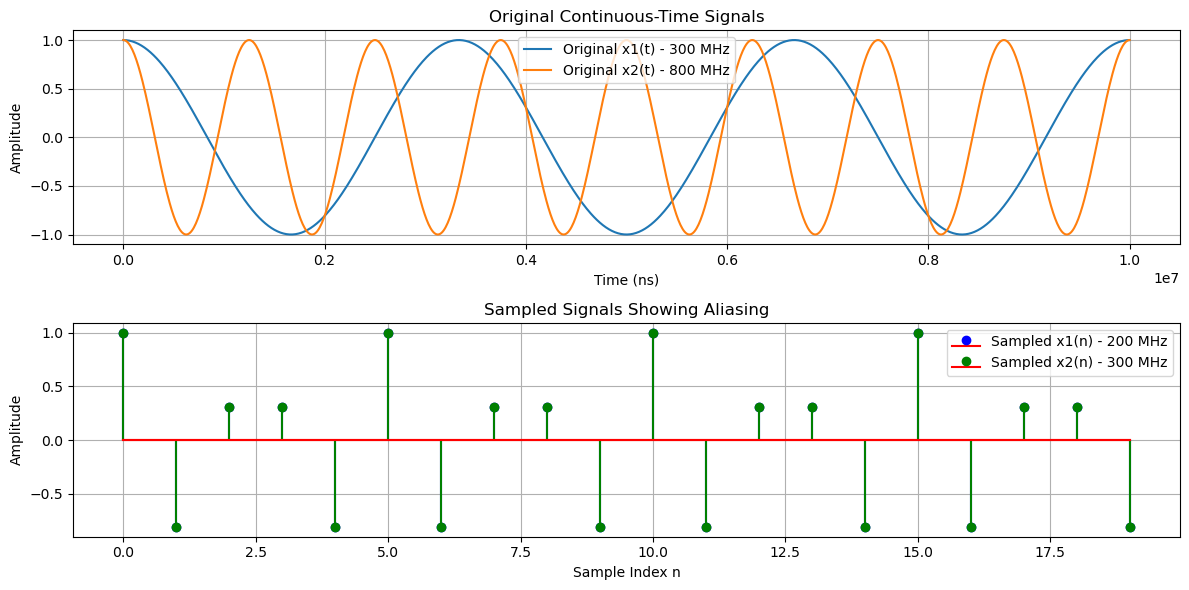

In [67]:
#2.a
F1 = 300  # MHz
F2 = 800  # MHz
Fs = 500  # Sampling frequency (MHz)
Ts = 1 / Fs  # Sampling period

# Define time samples (0 to 10 ns)
t = np.linspace(0, 10e-3, 1000)  # Continuous time
n = np.arange(0, 20)  # Discrete time indices

# Continuous signals
x1_t = np.cos(2 * np.pi * F1 * t)
x2_t = np.cos(2 * np.pi * F2 * t)

# Sampled signals
x1_n = np.cos(2 * np.pi * F1 * n * Ts)
x2_n = np.cos(2 * np.pi * F2 * n * Ts)

# Aliased signals based on calculated alias frequencies
F1_alias = abs(F1 - Fs)  # 200 MHz
F2_alias = abs(F2 - Fs)  # 300 MHz
x1_alias = np.cos(2 * np.pi * F1_alias * n * Ts)
x2_alias = np.cos(2 * np.pi * F2_alias * n * Ts)

# Plot continuous signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t * 1e9, x1_t, label=f"Original x1(t) - {F1} MHz")
plt.plot(t * 1e9, x2_t, label=f"Original x2(t) - {F2} MHz")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original Continuous-Time Signals")
plt.legend()
plt.grid()

# Plot sampled signals
plt.subplot(2, 1, 2)
plt.stem(n, x1_n, linefmt='b-', markerfmt='bo', basefmt='r-', label=f"Sampled x1(n) - {F1_alias} MHz")
plt.stem(n, x2_n, linefmt='g-', markerfmt='go', basefmt='r-', label=f"Sampled x2(n) - {F2_alias} MHz")
plt.xlabel("Sample Index n")
plt.ylabel("Amplitude")
plt.title("Sampled Signals Showing Aliasing")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [13]:
#These signals will be difficult to recover, but can be by using interpolation and other DSP techniques

In [14]:
#2.c
# The ZOH equation is x(t) = sigma(-infinity, infinity) x(n)*rect((t-nT)/W)

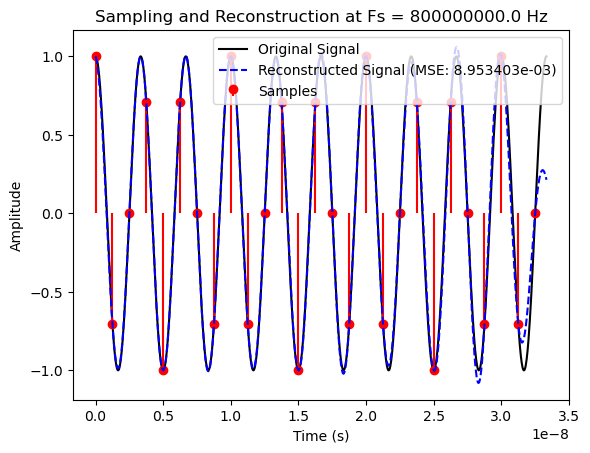

Mean Square Error (Normal Sampling): 8.953403e-03


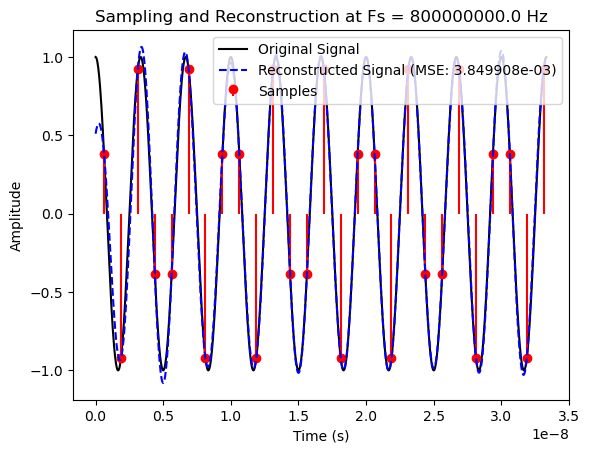

Mean Square Error (Phase Shifted Sampling): 3.849908e-03


In [61]:
#2.d
def sample_and_reconstruct(F, Fs, T, phase_shift=0):
    Ts = 1 / Fs
    t = np.arange(0, T, Ts)
    x_t = np.cos(2 * np.pi * F * t)
    
    # Sample the signal
    sample_times = t + phase_shift
    x_samples = np.cos(2 * np.pi * F * sample_times)
    
    # Reconstruction using sinc interpolation
    t_interp = np.linspace(0, T, 1000)
    x_interp = np.sum(x_samples[:, None] * np.sinc((t_interp - sample_times[:, None]) / Ts), axis=0)

    x_t_interp = np.cos(2 * np.pi * F * t_interp) 
    mse = np.mean((x_t_interp - x_interp) ** 2)
    
    plt.figure()
    plt.plot(t_interp, np.cos(2 * np.pi * F * t_interp), 'k', label="Original Signal")
    plt.stem(sample_times, x_samples, 'r', markerfmt='ro', basefmt=" ", linefmt='r-', label="Samples")
    plt.plot(t_interp, x_interp, 'b--', label=f"Reconstructed Signal (MSE: {mse:.6e})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper right")
    plt.title(f"Sampling and Reconstruction at Fs = {Fs} Hz")
    plt.show()

    return mse

# Simulation parameters
F1 = 300e6  # Frequency of x1(t)
F2 = 800e6  # Frequency of x2(t)
Fs_sample = 800e6  # Sampling rate
T = 10 / F1  # 10 cycles of x1(t)

# Sample and reconstruct x1(t)
mse1 = sample_and_reconstruct(F1, Fs_sample, T)
print(f"Mean Square Error (Normal Sampling): {mse1:.6e}")

# Sample and reconstruct x1(t) with phase shift Ts/2
mse2 = sample_and_reconstruct(F1, Fs_sample, T, phase_shift=1/(2*Fs_sample))
print(f"Mean Square Error (Phase Shifted Sampling): {mse2:.6e}")


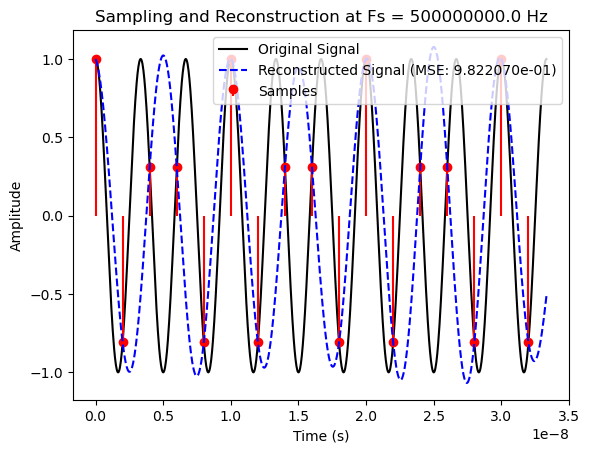

Mean Square Error (Normal Sampling): 9.822070e-01


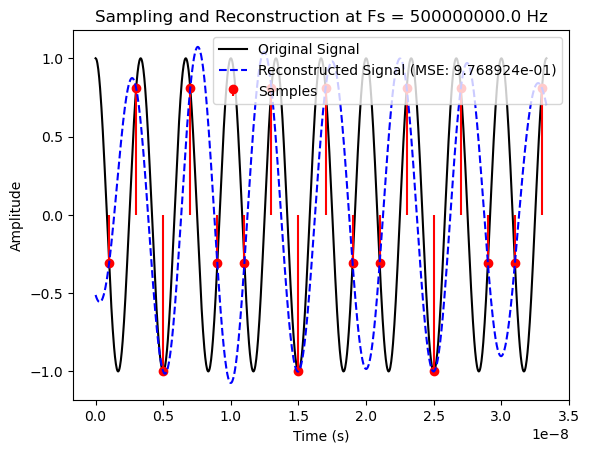

Mean Square Error (Phase Shifted Sampling): 9.768924e-01


In [65]:
Fs_sample = 500e6  # Sampling rate
T = 10 / F1  # 10 cycles of x1(t)

mse1 = sample_and_reconstruct(F1, Fs_sample, T)
print(f"Mean Square Error (Normal Sampling): {mse1:.6e}")

# Sample and reconstruct x1(t) with phase shift Ts/2
mse2 = sample_and_reconstruct(F1, Fs_sample, T, phase_shift=1/(2*Fs_sample))
print(f"Mean Square Error (Phase Shifted Sampling): {mse2:.6e}")

In [ ]:
#For 500MHz we can see that the reconstructed signal is out of phase with the original signal

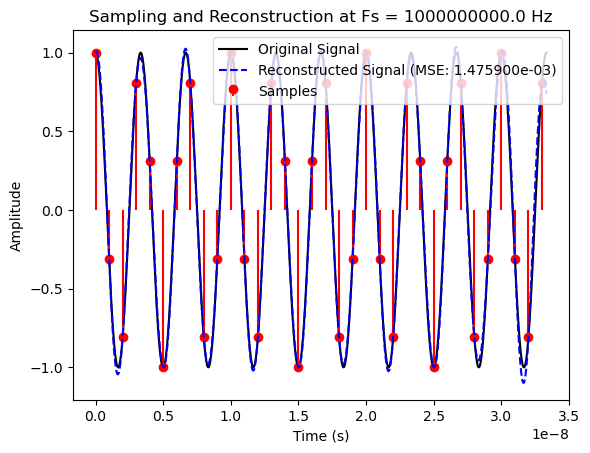

Mean Square Error (Normal Sampling): 1.475900e-03


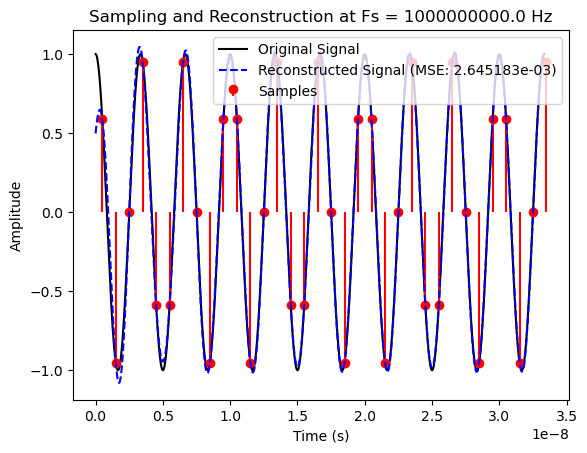

Mean Square Error (Phase Shifted Sampling): 2.645183e-03


In [55]:
Fs_sample = 1000e6  # Sampling rate
T = 10 / F1  # 10 cycles of x1(t)

mse1 = sample_and_reconstruct(F1, Fs_sample, T)
print(f"Mean Square Error (Normal Sampling): {mse1:.6e}")

# Sample and reconstruct x1(t) with phase shift Ts/2
mse2 = sample_and_reconstruct(F1, Fs_sample, T, phase_shift=1/(2*Fs_sample))
print(f"Mean Square Error (Phase Shifted Sampling): {mse2:.6e}")

In [ ]:
#For 1000M the reconstructed signal is much more accurate and aligns with the original signal

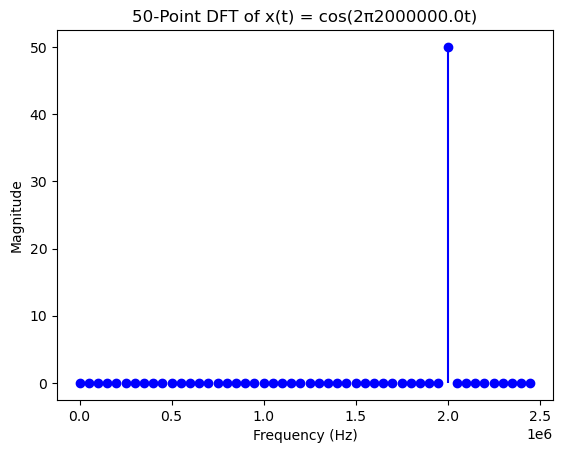

In [99]:
#3.a
from scipy.fft import fft, fftfreq
# Number of sample points
N = 100
F = 2e6
Fs = 5e6
T = 1.0 / F
Ts = 1 / Fs
    
t = np.arange(N) * Ts
x_n = np.cos(2 * np.pi * F * t)

X_k = fft(x_n, N)
freqs = fftfreq(N, Ts)

plt.figure()
plt.stem(freqs[:N//2], np.abs(X_k[:N//2]), 'b', markerfmt='bo', basefmt=" ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"50-Point DFT of x(t) = cos(2π{F}t)")
plt.show()

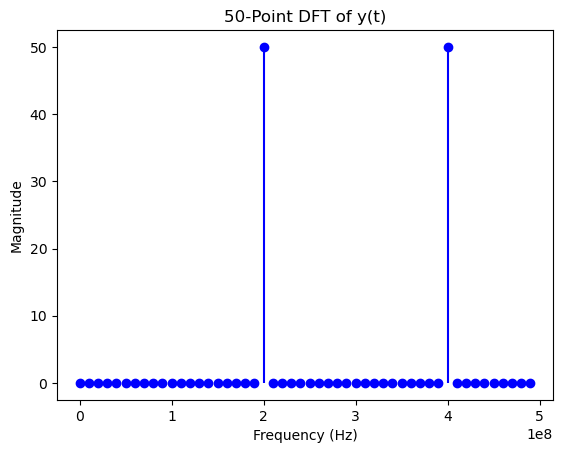

In [101]:
#3.b
F1 = 200e6
F2 = 400e6
Fs = 1e9
Ts = 1/Fs

t = np.arange(N) * Ts
y_t = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t)
X_k = fft(y_t, N)
freqs = fftfreq(N, Ts)

plt.figure()
plt.stem(freqs[:N//2], np.abs(X_k[:N//2]), 'b', markerfmt='bo', basefmt=" ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"50-Point DFT of y(t)")
plt.show()

In [ ]:
#Here we can see the two components at 200MHz and 400MHz

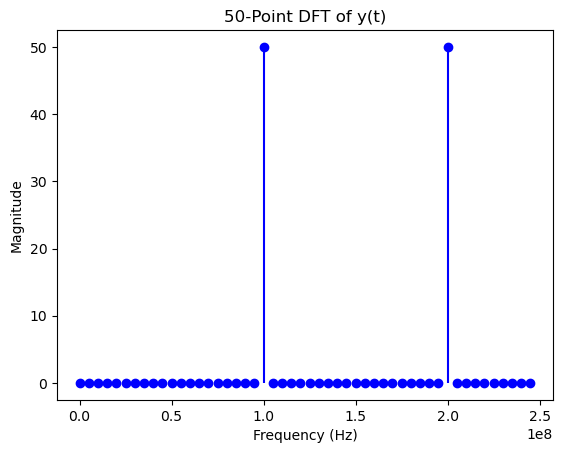

In [105]:
#3.c
F1 = 200e6
F2 = 400e6
Fs = 500e6
Ts = 1/Fs

t = np.arange(N) * Ts
y_t = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t)
X_k = fft(y_t, N)
freqs = fftfreq(N, Ts)

plt.figure()
plt.stem(freqs[:N//2], np.abs(X_k[:N//2]), 'b', markerfmt='bo', basefmt=" ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"50-Point DFT of y(t)")
plt.show()

In [ ]:
#Here we can see that the signal components are at 100MHz and 200MHz

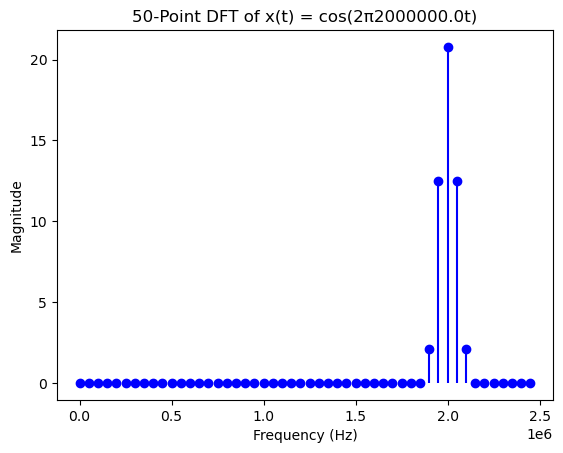

In [107]:
#3.d
N = 100
F = 2e6
Fs = 5e6
T = 1.0 / F
Ts = 1 / Fs

t = np.arange(N) * Ts
x_n = np.cos(2 * np.pi * F * t)
window = np.blackman(len(x_n))
x_n *= window

X_k = fft(x_n, N)
freqs = fftfreq(N, Ts)

plt.figure()
plt.stem(freqs[:N//2], np.abs(X_k[:N//2]), 'b', markerfmt='bo', basefmt=" ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"50-Point DFT of x(t) = cos(2π{F}t)")
plt.show()

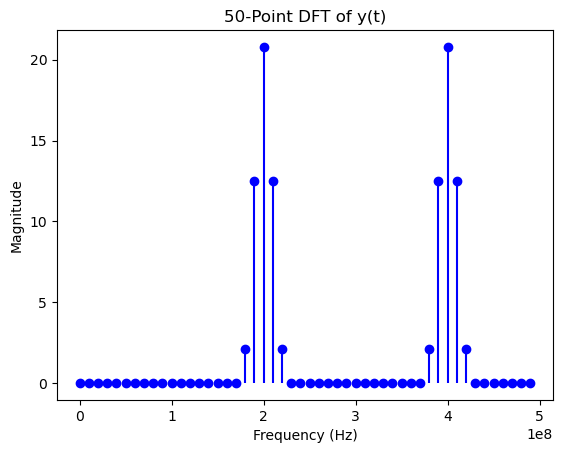

In [109]:
F1 = 200e6
F2 = 400e6
Fs = 1e9
Ts = 1/Fs

t = np.arange(N) * Ts
y_t = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t)
window = np.blackman(len(y_t))
y_t *= window

X_k = fft(y_t, N)
freqs = fftfreq(N, Ts)

plt.figure()
plt.stem(freqs[:N//2], np.abs(X_k[:N//2]), 'b', markerfmt='bo', basefmt=" ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"50-Point DFT of y(t)")
plt.show()

In [ ]:
#From the two plots we can see that the Blackman window spreads the signal components 